# COGS 108 - Final Project: Maximizing the Amount of Karma on Reddit

# Overview

The research we conducted focuses on the effect of time on the upvotes and comments generated for a given post on a particular subreddit. We investigated the optimal time of day, and day of the week to post on the subreddit 'r/funny' that would produce the greatest amount of upvotes, comments, and views to readily predict a high karma count. In order to do so, we ran a script that utilizes the Reddit API to collect data on the amount of upvotes, comments, and online users in 30 minute period intervals of a single day over the course of the week. The script-collected data were then stored into csv files to be analyzed.

# Names

- Cyrus Shen
- Randy Vo
- Kimberly Chuong
- Josue Ayala
- Conner Henderson
- Mykel Rodriguez

# Group Members IDs

- A13370306
- A12759508
- A15022184
- A13352380
- A12855214
- A13779712

# Research Question

What day of the week and time of day is optimal for maximizing the amount of karma for a given post on the r/funny subreddit of Reddit based on the detrminants of the average number of online users, average number of comments, and average number of upvotes? And does the number of online users at a given time contribute to the amount of upvotes and comments a post receives?

## Background and Prior Work

Reddit, at its crux, is a social platform and content aggregation website that allows users to post submissions, comment on posts, and vote on other user-generated submissions. These convenient features offer support in a variety of activities, such as the collective user contribution to discussions in a wider audience and quickly viewing content (e.g. current news stories). With these features being user-focused, Reddit becomes built around the community. Its community-based platform appeals to many people as indicated by Reddit's accumulated total visits of about 430 million active monthly users by the end of October 2019. According to Alexa Internet, Reddit was ranked the 5th most visited website in the United States, along with a rank in the 13th position for the most visited website in the world as of July 2019. As one of the top leading social platforms of this generation with an amassed following in the 100 millions, this leads us to wonder what day and time would be the most favorable in garnering the most activity in a post. Finding out this information would be beneficial in identifying a specific time window in which posts could be recognized by more users, and favorably end up in Reddit's front page of the Internet.

The following prior works metioned below were complementary to our project:

A similar analysis “Web-scraping reddit: Analyzing user behavior and top content from a marketing perspective” was done by Mitchell Hung on the NYC Data Science Academy blog that analyzed patterns in user behavior and Reddit structure. His research found defining features that was attributed to the top Reddit posts: submissions with the right content (for example, an image), submissions posted at the right time, and subreddits with the most amount of upvotes got matched up to the most popular subreddits with more activity. 
- 1) Source: https://nycdatascience.com/blog/student-works/web-scraping-reddit-analyzing-user-behavior-and-top-content-from-a-marketing-perspective/

There is a big data project created and maintained by Jason Baumgartner that analyzes major Reddit trends and allows free and open access to the source code. His website updates constantly in real time to show all of the Reddit activity happening per second, minute, and hour; broken down into comments and submissions. He also has the top subreddits (ordered by most activity), top discussion topics, and top authors (ordered by most recent comments and submissions). His website gave inspiration to our research.
- 2) Source: https://pushshift.io/

# Hypothesis


We hypothesize that posting submissions during the weekends will be more effective in accumulating upvotes instead of weekdays, and that time periods occuring in the morning will be more effective in getting more upvotes than evenings and afternoons. Specifically, we predict that Saturday at 9am will have the most posts overall with the highest upvotes and comments. Thus, we anticipate that the optimal time to post on the r/funny subreddit to obtain the highest karma is Saturday morning. This is based on the reasoning that we assume the majority of Reddit users tend to access the application after a long week of labor/school.

# Dataset(s)

## Reddit API

The Reddit API is a service offered by the official Reddit website that allows access to extracting a multitude of its available information. For this project, we scraped data for the the first 100 posts from the 'new' section of the 'r/funny' subreddit for each day and followed those posts for 24 hours (data points apportioned into 30 minute intervals) across all 7 days of the week. This was done while also collecting information on the number of upvotes, number of comments, and number of users online at corresponding time periods into csv files.

- Dataset Name: Reddit API
- Link to the dataset: https://www.reddit.com/wiki/api, https://github.com/reddit-archive/reddit/wiki/API
- Number of observations: Reddit API gives access to all submissions on their website, so there is an unlimited number of data   points we could gather. The datasets for one particular day of the week consists of 4900 observations each for both number of   upvotes and number of comments, and 49 observations for number of users online. Total data points is close to 70000.

# Setup

In [1]:
# Import libraries for data wrangling, data cleaning, and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure the imported libraries

# Display plots directly on the notebook
%matplotlib inline

# Display all columns and rows in DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Control figure aesthetics for seaborn
sns.set()
sns.set_context('talk')

## Reddit API Script for Data Collection

To run our analysis based on data from Reddit, we first had to gain permission to use Reddit's API. The Reddit API is readily accessible after registering for use, and is easily manipulated using the Reddit API wrapper, Python praw.

The following script executes for a duration of 24 hours while collecting the first 100 posts made in the 'new' section of the subreddit 'r/funny' at midnight, and follows those 100 posts to track each of their corresponding amount of upvotes and comments every 30 minutes. The script also gathers data for the number of online users for every 30 minute interval. The collected data points is then stored into csv files to constitute as individual datasets.

For our project, we ran this code at midnight and ended at the midnight of the next day to cover the 24 hour period.

In [3]:
#collect data for 24hrs
import time
from datetime import datetime
import praw
import pandas as pd

run = False #change this to True to run
reddit = praw.Reddit(client_id='eOqj6Q2BiQQyKQ', client_secret='1hqeAwOvlkY1PYw51ewhbrItd5k', user_agent='Reddit WebScrapping')

sub_title = 'funny' #title of subreddit to scrape

time2sleep = 1800 #how long the program should sleep before continuing
hours = 48 #how long(30 minute intervals) you want to run the script for
count = 0 #each count represents 1 interval passing

dt_object = datetime.fromtimestamp(time.time())
weekday = dt_object.strftime('%A')

fname_votes = './{}_votes.csv'.format(weekday)
fname_comments = './{}_comments.csv'.format(weekday)
fname_online = './{}_online_users.csv'.format(weekday)

votes = {} #store post ids and votes. Positive votes and NEGATIVE votes (when post.downs is > 0)
totalcomments = {} #store post ids and the corresponding number of comments
online = {'timestamp':[],'users_online':[]} #store number of online users and timestamp of subreddit

subred = reddit.subreddit(sub_title)

#get 100 posts from new
sub_posts = subred.new(limit=100)

#initialize the storage of the 100 posts that we are tracking
for post in sub_posts:
    pid = str(post.id)
    if pid not in votes: #if new post, add it to the dictionary
        votes[pid] = [] #initialize empty list
        totalcomments[pid] = [] #initialize empty list
    else:#just in case we get some repeating posts
        pass

while (count <= hours) and run:
    
    print('Starting 30min interval {}'.format(count))
    subred = reddit.subreddit(sub_title)
    #every 30minutes store number of online users in the subreddit
    online['timestamp'].append(time.time())
    online['users_online'].append(subred.active_user_count)
    
    for id_val in votes.keys():
        result = reddit.submission(id=id_val) #go to the specific post
        votes[id_val].append(result.ups - result.downs) #get the current number of upvotes and add to the list
        totalcomments[id_val].append(result.num_comments) #get number of comments
        
    #store into csv every 30min interval in case something goes wrong halfway through
    upvotes = pd.DataFrame(list(votes.values()),index=votes.keys())
    upvotes.to_csv(fname_votes,index_label='id')

    comments = pd.DataFrame(list(totalcomments.values()),index=totalcomments.keys())
    comments.to_csv(fname_comments,index_label='id')

    on = pd.DataFrame(list(online.values()),index=online.keys())
    on.to_csv(fname_online,index_label='timestamp')
    
    if count == hours:
        print('finished collecting data')
        break
    else:
        print('sleeping for {} seconds...'.format(time2sleep))
        time.sleep(time2sleep)
        count+=1

# Data Cleaning

Let's take a look at the csv file datasets we have collected. To start off, we will use Sunday's datasets as an example to check the number of upvotes, number of comments, and number of online users. Datasets are the same layout across all days in their respective categories of upvotes, comments, and users online.

In [4]:
# Load Sunday_upvotes.csv file into a DataFrame
df_Sunday_upvotes = pd.read_csv('Sunday_upvotes.csv')

# Check the first few rows
df_Sunday_upvotes.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,dxjvx7,1,5,6,7,7,5,4,4,6,7,5,3,3,3,4,2,5,3,4,4,5,6,2,5,6,6,6,3,4,2,4,2,3,4,4,5,4,4,4,4,3,4,3,3,3,3,6,5,2
1,dxjvrw,2,18,26,27,26,33,36,36,37,36,37,34,35,38,35,37,34,34,35,39,39,34,37,35,34,39,35,33,38,37,37,38,33,38,39,38,35,35,36,33,36,37,37,33,38,36,37,34,36
2,dxjvlv,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dxjvi3,4,27,34,55,66,69,77,85,92,102,111,124,125,128,132,126,129,128,133,138,135,140,139,144,144,144,142,146,146,148,146,149,147,147,149,153,151,147,146,152,148,149,149,145,149,148,152,149,149
4,dxjv8u,1,7,7,6,5,5,5,6,5,4,6,6,6,6,7,5,8,5,5,6,6,7,5,6,6,6,4,4,5,7,6,5,8,6,4,5,5,6,7,4,7,4,7,6,7,5,6,8,7


In [5]:
# Load Sunday_comments.csv file into a DataFrame
df_Sunday_comments = pd.read_csv('Sunday_comments.csv')
df_Sunday_comments.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,dxjvx7,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,dxjvrw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,dxjvlv,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,dxjvi3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,dxjv8u,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [6]:
# Load Sunday_online_users.csv file into a DataFrame
df_Sunday_online_users = pd.read_csv('Sunday_online_users.csv', index_col = 0)
df_Sunday_online_users.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
timestamp,1.573978e+09,1.573979e+09,1.573981e+09,1.573983e+09,1.573985e+09,1.573987e+09,1.573988e+09,1.573990e+09,1.573992e+09,1.573994e+09,1.573996e+09,1.573998e+09,1.573999e+09,1.574001e+09,1.574003e+09,1.574005e+09,1.574007e+09,1.574009e+09,1.574010e+09,1.574012e+09,1.574014e+09,1.574016e+09,1.574018e+09,1.574019e+09,1.574021e+09,1.574023e+09,1.574025e+09,1.574027e+09,1.574029e+09,1.574030e+09,1.574032e+09,1.574034e+09,1.574036e+09,1.574038e+09,1.574039e+09,1.574041e+09,1.574043e+09,1.574045e+09,1.574047e+09,1.574049e+09,1.574050e+09,1.574052e+09,1.574054e+09,1.574056e+09,1.574058e+09,1.574060e+09,1.574061e+09,1.574063e+09,1.574065e+09
users_online,2.012800e+04,2.198900e+04,2.210100e+04,2.531800e+04,2.667100e+04,1.683600e+04,1.760700e+04,1.843800e+04,1.992500e+04,2.666500e+04,2.677800e+04,3.675000e+04,4.600300e+04,7.104600e+04,5.769500e+04,6.357800e+04,2.788000e+04,3.209100e+04,6.131300e+04,5.629900e+04,5.533500e+04,5.356600e+04,6.809000e+04,5.293300e+04,4.641200e+04,4.414000e+04,4.266400e+04,4.330800e+04,4.390300e+04,4.387400e+04,4.877100e+04,4.997800e+04,4.763000e+04,4.541000e+04,5.162000e+04,5.217000e+04,4.810800e+04,4.170900e+04,3.703400e+04,3.584300e+04,3.317400e+04,3.570100e+04,4.902900e+04,5.825500e+04,5.205100e+04,4.384900e+04,3.820600e+04,3.752000e+04,3.499100e+04


Looking at the datasets above, we see that there are no column names indicated, making the datasets overall not human reader-friendly. Therefore, some data cleaning needs to be done to increase the readability of these datasets for further analysis.

In [7]:
# Create a variable to rename columns to time in 30 minute increments
time_cols = {'0': '12:00 am', '1': '12:30 am', '2': '1:00 am', '3': '1:30 am', '4': '2:00 am', '5': '2:30 am', '6': '3:00 am', '7': '3:30 am', '8':'4:00 am', '9': '4:30 am', '10': '5:00 am', '11': '5:30 am', '12': '6:00 am', '13': '6:30 am', '14': '7:00 am', '15': '7:30 am', '16': '8:00 am', '17': '8:30 am', '18': '9:00 am', '19': '9:30 am', '20': '10:00 am', '21': '10:30 am', '22': '11:00 am', '23': '11:30 am', '24': '12:00 pm', '25': '12:30 pm', '26': '1:00 pm', '27': '1:30 pm', '28': '2:00 pm', '29': '2:30 pm', '30': '3:00 pm', '31': '3:30 pm', '32': '4:00 pm', '33': '4:30 pm', '34': '5:00 pm', '35': '5:30 pm', '36': '6:00 pm', '37': '6:30 pm', '38': '7:00 pm', '39': '7:30 pm', '40': '8:00 pm', '41': '8:30 pm', '42': '9:00 pm', '43': '9:30 pm', '44': '10:00 pm', '45': '10:30 pm', '46': '11:00 pm', '47': '11:30 pm', '48': '11:59 pm'}

# Add/rename column names for Sunday upvotes
df_Sunday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Sunday_upvotes.rename(columns = time_cols, inplace = True)

df_Sunday_upvotes.head()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
0,dxjvx7,1,5,6,7,7,5,4,4,6,7,5,3,3,3,4,2,5,3,4,4,5,6,2,5,6,6,6,3,4,2,4,2,3,4,4,5,4,4,4,4,3,4,3,3,3,3,6,5,2
1,dxjvrw,2,18,26,27,26,33,36,36,37,36,37,34,35,38,35,37,34,34,35,39,39,34,37,35,34,39,35,33,38,37,37,38,33,38,39,38,35,35,36,33,36,37,37,33,38,36,37,34,36
2,dxjvlv,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dxjvi3,4,27,34,55,66,69,77,85,92,102,111,124,125,128,132,126,129,128,133,138,135,140,139,144,144,144,142,146,146,148,146,149,147,147,149,153,151,147,146,152,148,149,149,145,149,148,152,149,149
4,dxjv8u,1,7,7,6,5,5,5,6,5,4,6,6,6,6,7,5,8,5,5,6,6,7,5,6,6,6,4,4,5,7,6,5,8,6,4,5,5,6,7,4,7,4,7,6,7,5,6,8,7


In [8]:
# Add/rename column names for Sunday comments
df_Sunday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Sunday_comments.rename(columns = time_cols, inplace = True)

df_Sunday_comments.head()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
0,dxjvx7,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,dxjvrw,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,dxjvlv,0,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,dxjvi3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,dxjv8u,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [9]:
# Add/rename column names for Sunday online users
df_Sunday_online_users.rename(columns = time_cols, inplace = True)

# Switch rows and columns
df_Sunday_online_users = df_Sunday_online_users.transpose()

# Drop first column since we are only interested in plotting the number of online users
df_Sunday_online_users = df_Sunday_online_users.drop('timestamp', axis=1)

df_Sunday_online_users.head()

,users_online
12:00 am,20128.0
12:30 am,21989.0
1:00 am,22101.0
1:30 am,25318.0
2:00 am,26671.0


We now do the same cleaning for the datasets of the remaining days of the week (Monday through Saturday).

In [10]:
# Clean Monday files
df_Monday_upvotes = pd.read_csv('Monday_votes.csv')
df_Monday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Monday_upvotes.rename(columns = time_cols, inplace = True)

df_Monday_comments = pd.read_csv('Monday_comments.csv')
df_Monday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Monday_comments.rename(columns = time_cols, inplace = True)

df_Monday_online_users = pd.read_csv('Monday_online_users.csv', index_col = 0)
df_Monday_online_users.rename(columns = time_cols, inplace = True)
df_Monday_online_users = df_Monday_online_users.transpose()
df_Monday_online_users = df_Monday_online_users.drop('timestamp', axis=1)

In [11]:
# Clean Tuesday files
df_Tuesday_upvotes = pd.read_csv('Tuesday_votes.csv')
df_Tuesday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Tuesday_upvotes.rename(columns = time_cols, inplace = True)

df_Tuesday_comments = pd.read_csv('Tuesday_comments.csv')
df_Tuesday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Tuesday_comments.rename(columns = time_cols, inplace = True)

df_Tuesday_online_users = pd.read_csv('Tuesday_online_users.csv', index_col = 0)
df_Tuesday_online_users.rename(columns = time_cols, inplace = True)
df_Tuesday_online_users = df_Tuesday_online_users.transpose()
df_Tuesday_online_users = df_Tuesday_online_users.drop('timestamp', axis=1)

In [12]:
# Clean Wednesday files
df_Wednesday_upvotes = pd.read_csv('Wednesday_votes.csv')
df_Wednesday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Wednesday_upvotes.rename(columns = time_cols, inplace = True)

df_Wednesday_comments = pd.read_csv('Wednesday_comments.csv')
df_Wednesday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Wednesday_comments.rename(columns = time_cols, inplace = True)

df_Wednesday_online_users = pd.read_csv('Wednesday_online_users.csv', index_col = 0)
df_Wednesday_online_users.rename(columns = time_cols, inplace = True)
df_Wednesday_online_users = df_Wednesday_online_users.transpose()
df_Wednesday_online_users = df_Wednesday_online_users.drop('timestamp', axis=1)

In [13]:
# Clean Thursday files
df_Thursday_upvotes = pd.read_csv('Thursday_votes.csv')
df_Thursday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Thursday_upvotes.rename(columns = time_cols, inplace = True)

df_Thursday_comments = pd.read_csv('Thursday_comments.csv')
df_Thursday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Thursday_comments.rename(columns = time_cols, inplace = True)

df_Thursday_online_users = pd.read_csv('Thursday_online_users.csv', index_col = 0)
df_Thursday_online_users.rename(columns = time_cols, inplace = True)
df_Thursday_online_users = df_Thursday_online_users.transpose()
df_Thursday_online_users = df_Thursday_online_users.drop('timestamp', axis=1)

In [14]:
# Clean Friday files
df_Friday_upvotes = pd.read_csv('Friday_upvotes.csv')
df_Friday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Friday_upvotes.rename(columns = time_cols, inplace = True)

df_Friday_comments = pd.read_csv('Friday_comments.csv')
df_Friday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Friday_comments.rename(columns = time_cols, inplace = True)

df_Friday_online_users = pd.read_csv('Friday_online.csv', index_col = 0)
df_Friday_online_users.rename(columns = time_cols, inplace = True)
df_Friday_online_users = df_Friday_online_users.transpose()
df_Friday_online_users = df_Friday_online_users.drop('timestamp', axis=1)

In [15]:
# Clean Saturday files
df_Saturday_upvotes = pd.read_csv('Saturday_votes.csv')
df_Saturday_upvotes.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Saturday_upvotes.rename(columns = time_cols, inplace = True)

df_Saturday_comments = pd.read_csv('Saturday_comments.csv')
df_Saturday_comments.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)
df_Saturday_comments.rename(columns = time_cols, inplace = True)

df_Saturday_online_users = pd.read_csv('Saturday_online_users.csv', index_col = 0)
df_Saturday_online_users.rename(columns = time_cols, inplace = True)
df_Saturday_online_users = df_Saturday_online_users.transpose()
df_Saturday_online_users = df_Saturday_online_users.drop('timestamp', axis=1)

## Check Missing Values

Extracting data from the Reddit API most certainly outputs clean data values, as long as it is within the bounds of its API documentation. However, we will still check for any possible missing entries in our datasets as a precaution.

In [16]:
# Create a function to check the total number of missing values a specified dataframe has
def missing_values(df):
    if df.isnull().sum().sum() == 0:
        print('No missing value(s) detected in dataset.')

    else:
        total_number_missing = str(df.isnull().sum().sum())
        print('Missing value(s) detected in dataset: ' + total_number_missing)

# Check any missing values in all collected datasets
print('FOR SUNDAY DATASETS:')
missing_values(df_Sunday_upvotes)
missing_values(df_Sunday_comments)
missing_values(df_Sunday_online_users)

print('\n')

print('FOR MONDAY DATASETS:')
missing_values(df_Monday_upvotes)
missing_values(df_Monday_comments)
missing_values(df_Monday_online_users)

print('\n')

print('FOR TUESDAY DATASETS:')
missing_values(df_Tuesday_upvotes)
missing_values(df_Tuesday_comments)
missing_values(df_Tuesday_online_users)

print('\n')

print('FOR WEDNESDAY DATASETS:')
missing_values(df_Wednesday_upvotes)
missing_values(df_Wednesday_comments)
missing_values(df_Wednesday_online_users)

print('\n')

print('FOR THURSDAY DATASETS:')
missing_values(df_Thursday_upvotes)
missing_values(df_Thursday_comments)
missing_values(df_Thursday_online_users)

print('\n')

print('FOR FRIDAY DATASETS:')
missing_values(df_Friday_upvotes)
missing_values(df_Friday_comments)
missing_values(df_Friday_online_users)

print('\n')

print('FOR SATURDAY DATASETS:')
missing_values(df_Saturday_upvotes)
missing_values(df_Saturday_comments)
missing_values(df_Saturday_online_users)

FOR SUNDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR MONDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR TUESDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR WEDNESDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR THURSDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR FRIDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.


FOR SATURDAY DATASETS:
No missing value(s) detected in dataset.
No missing value(s) detected in dataset.
No missing va

Now that we have checked that none of our datasets contain any missing entries, we can get to modifying them for plotting graphs.

## Find the Average Number of Upvotes

Before starting our analyses on the data, we need to find the average number of upvotes in all datasets corresponding to 30 minute intervals of the 24-hour period. We will use these averages as plot points for our line graphs for each day of the week.

In [17]:
# Find the mean for all 30 minute time intervals for every day of the week
df_Sunday_upvotes.loc['mean'] = df_Sunday_upvotes.mean()
df_Monday_upvotes.loc['mean'] = df_Monday_upvotes.mean()
df_Tuesday_upvotes.loc['mean'] = df_Tuesday_upvotes.mean()
df_Wednesday_upvotes.loc['mean'] = df_Wednesday_upvotes.mean()
df_Thursday_upvotes.loc['mean'] = df_Thursday_upvotes.mean()
df_Friday_upvotes1 = df_Friday_upvotes # Will be used for looking at individual day rates
df_Friday_upvotes.loc['mean'] = df_Friday_upvotes.mean()
df_Saturday_upvotes.loc['mean'] = df_Saturday_upvotes.mean()

# Check the last few rows for Sunday
df_Sunday_upvotes.tail()

,id,12:00 am,12:30 am,1:00 am,1:30 am,2:00 am,2:30 am,3:00 am,3:30 am,4:00 am,4:30 am,5:00 am,5:30 am,6:00 am,6:30 am,7:00 am,7:30 am,8:00 am,8:30 am,9:00 am,9:30 am,10:00 am,10:30 am,11:00 am,11:30 am,12:00 pm,12:30 pm,1:00 pm,1:30 pm,2:00 pm,2:30 pm,3:00 pm,3:30 pm,4:00 pm,4:30 pm,5:00 pm,5:30 pm,6:00 pm,6:30 pm,7:00 pm,7:30 pm,8:00 pm,8:30 pm,9:00 pm,9:30 pm,10:00 pm,10:30 pm,11:00 pm,11:30 pm,11:59 pm
96,dxi2zw,4.00,5.00,6.00,4.00,4.00,5.0,7.00,6.00,4.00,5.00,6.00,5.00,5.00,5.00,5.00,6.00,4.00,4.00,3.00,4.00,6.00,5.00,6.00,5.00,4.00,6.00,4.00,6.00,6.00,5.00,4.00,7.00,5.0,3.00,5.00,4.00,6.00,7.0,4.00,4.00,7.00,4.00,6.0,3.00,4.00,3.00,7.00,5.00,4.00
97,dxi1lg,253.00,304.00,353.00,411.00,462.00,489.0,515.00,557.00,576.00,578.00,580.00,579.00,579.00,583.00,581.00,579.00,579.00,580.00,575.00,584.00,576.00,584.00,578.00,587.00,586.00,586.00,582.00,586.00,580.00,582.00,585.00,586.00,585.0,586.00,580.00,585.00,583.00,584.0,582.00,587.00,587.00,591.00,589.0,581.00,584.00,581.00,585.00,584.00,586.00
98,dxi1k9,148.00,174.00,212.00,260.00,294.00,316.0,334.00,363.00,395.00,432.00,496.00,535.00,566.00,578.00,584.00,617.00,635.00,650.00,660.00,675.00,687.00,709.00,715.00,726.00,728.00,741.00,750.00,757.00,764.00,771.00,772.00,780.00,785.0,781.00,788.00,791.00,790.00,788.0,792.00,793.00,794.00,801.00,796.0,804.00,800.00,797.00,803.00,800.00,800.00
99,dxi1e9,30.00,31.00,31.00,30.00,33.00,31.0,35.00,38.00,34.00,38.00,40.00,40.00,38.00,39.00,45.00,43.00,42.00,37.00,42.00,43.00,45.00,40.00,44.00,45.00,41.00,44.00,39.00,44.00,41.00,41.00,42.00,40.00,39.0,41.00,43.00,39.00,43.00,37.0,39.00,41.00,39.00,45.00,39.0,42.00,42.00,41.00,41.00,41.00,45.00
mean,NaN,38.91,51.49,62.59,85.73,133.97,141.9,149.82,160.82,171.08,185.05,201.36,214.29,225.29,232.45,238.13,245.74,254.33,264.93,272.81,278.14,282.19,289.38,293.85,297.48,300.91,304.34,307.33,309.87,313.08,315.85,318.02,319.62,321.4,322.91,324.31,325.58,326.59,327.3,327.57,328.18,328.86,329.68,330.1,330.18,330.57,330.66,331.14,331.07,330.91


We are interested in plotting points for the average (mean) number of upvotes for each 30 minute interval, so we will be removing all rows and columns that are not relevant to plotting the average number of votes for the graphs. These extraneous data include the individual rows of upvotes for each 100 new posts from the r/funny subreddit. Since we will be plotting the averages, the NaN entry in the first column of the corresponding mean row will mess up the graphs during plotting. So, we will also do a removal of the id column.

In [18]:
# Drop all rows except mean
df_Sunday_mean_upvotes = df_Sunday_upvotes.drop(df_Sunday_upvotes.index[0:100])
df_Monday_mean_upvotes = df_Monday_upvotes.drop(df_Monday_upvotes.index[0:100])
df_Tuesday_mean_upvotes = df_Tuesday_upvotes.drop(df_Tuesday_upvotes.index[0:100])
df_Wednesday_mean_upvotes = df_Wednesday_upvotes.drop(df_Wednesday_upvotes.index[0:100])
df_Thursday_mean_upvotes = df_Thursday_upvotes.drop(df_Thursday_upvotes.index[0:100])
df_Friday_mean_upvotes = df_Friday_upvotes.drop(df_Friday_upvotes.index[0:100])
df_Saturday_mean_upvotes = df_Saturday_upvotes.drop(df_Saturday_upvotes.index[0:100])

In [19]:
# Drop the first column containing NaN value
df_Sunday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Monday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Tuesday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Wednesday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Thursday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Friday_mean_upvotes.dropna(axis=1, how='any', inplace = True)
df_Saturday_mean_upvotes.dropna(axis=1, how='any', inplace = True)

In [20]:
# Switch rows and columns
df_Sunday_mean_upvotes = df_Sunday_mean_upvotes.transpose()
df_Monday_mean_upvotes = df_Monday_mean_upvotes.transpose()
df_Tuesday_mean_upvotes = df_Tuesday_mean_upvotes.transpose()
df_Wednesday_mean_upvotes = df_Wednesday_mean_upvotes.transpose()
df_Thursday_mean_upvotes = df_Thursday_mean_upvotes.transpose()
df_Friday_mean_upvotes = df_Friday_mean_upvotes.transpose()
df_Saturday_mean_upvotes = df_Saturday_mean_upvotes.transpose()

# Check the modified dataset for Sunday
df_Sunday_mean_upvotes.head()

,mean
12:00 am,38.91
12:30 am,51.49
1:00 am,62.59
1:30 am,85.73
2:00 am,133.97


## Find the Average Number of Comments

Similarly to finding the average number of upvotes outlined above, we will also find the averages for the number of comments for each 30 minute interval over 24 hours.

In [21]:
# Find the mean for all 30 minute time intervals for every day of the week
df_Sunday_comments.loc['mean'] = df_Sunday_comments.mean()
df_Monday_comments.loc['mean'] = df_Monday_comments.mean()
df_Tuesday_comments.loc['mean'] = df_Tuesday_comments.mean()
df_Wednesday_comments.loc['mean'] = df_Wednesday_comments.mean()
df_Thursday_comments.loc['mean'] = df_Thursday_comments.mean()
df_Friday_comments.loc['mean'] = df_Friday_comments.mean()
df_Saturday_comments.loc['mean'] = df_Saturday_comments.mean()

In [22]:
# Drop all rows except mean
df_Sunday_mean_comments = df_Sunday_comments.drop(df_Sunday_comments.index[0:100])
df_Monday_mean_comments = df_Monday_comments.drop(df_Monday_comments.index[0:100])
df_Tuesday_mean_comments = df_Tuesday_comments.drop(df_Tuesday_comments.index[0:100])
df_Wednesday_mean_comments = df_Wednesday_comments.drop(df_Wednesday_comments.index[0:100])
df_Thursday_mean_comments = df_Thursday_comments.drop(df_Thursday_comments.index[0:100])
df_Friday_mean_comments = df_Friday_comments.drop(df_Friday_comments.index[0:100])
df_Saturday_mean_comments = df_Saturday_comments.drop(df_Saturday_comments.index[0:100])

In [23]:
# Drop the first column containing NaN value
df_Sunday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Monday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Tuesday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Wednesday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Thursday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Friday_mean_comments.dropna(axis=1, how='any', inplace = True)
df_Saturday_mean_comments.dropna(axis=1, how='any', inplace = True)

In [24]:
# Switch rows and columns
df_Sunday_mean_comments = df_Sunday_mean_comments.transpose()
df_Monday_mean_comments = df_Monday_mean_comments.transpose()
df_Tuesday_mean_comments = df_Tuesday_mean_comments.transpose()
df_Wednesday_mean_comments = df_Wednesday_mean_comments.transpose()
df_Thursday_mean_comments = df_Thursday_mean_comments.transpose()
df_Friday_mean_comments = df_Friday_mean_comments.transpose()
df_Saturday_mean_comments = df_Saturday_mean_comments.transpose()

# Check the modified dataset for Sunday
df_Sunday_mean_comments.head()

,mean
12:00 am,5.58
12:30 am,6.64
1:00 am,7.30
1:30 am,8.03
2:00 am,9.06


# Data Analysis & Results

Text(0, 0.5, 'Rate Per Half Hour')

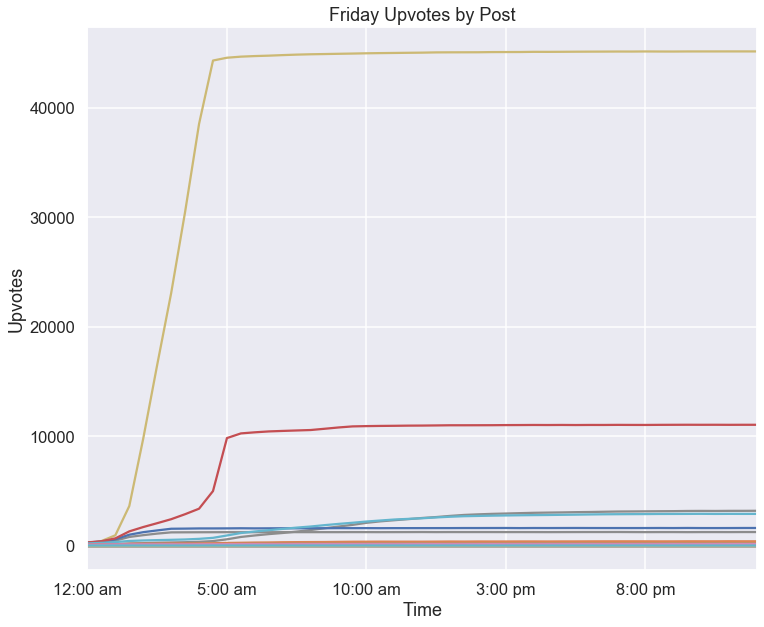

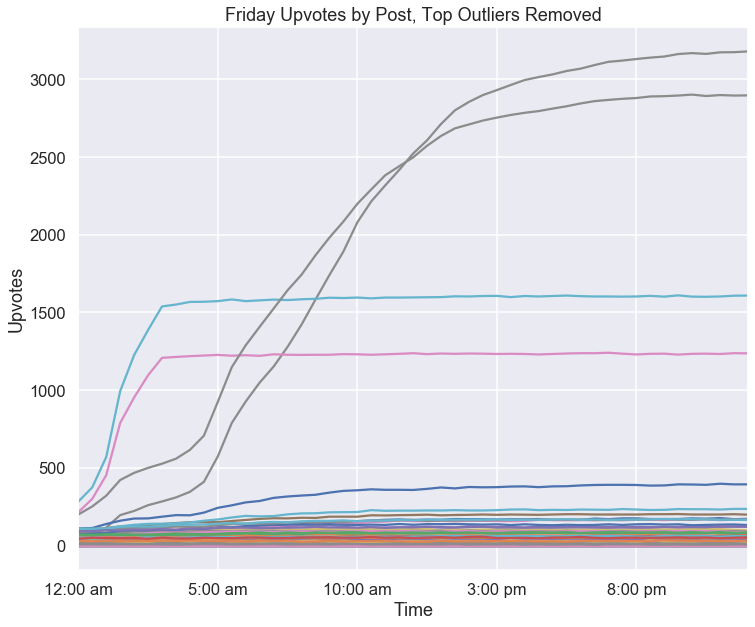

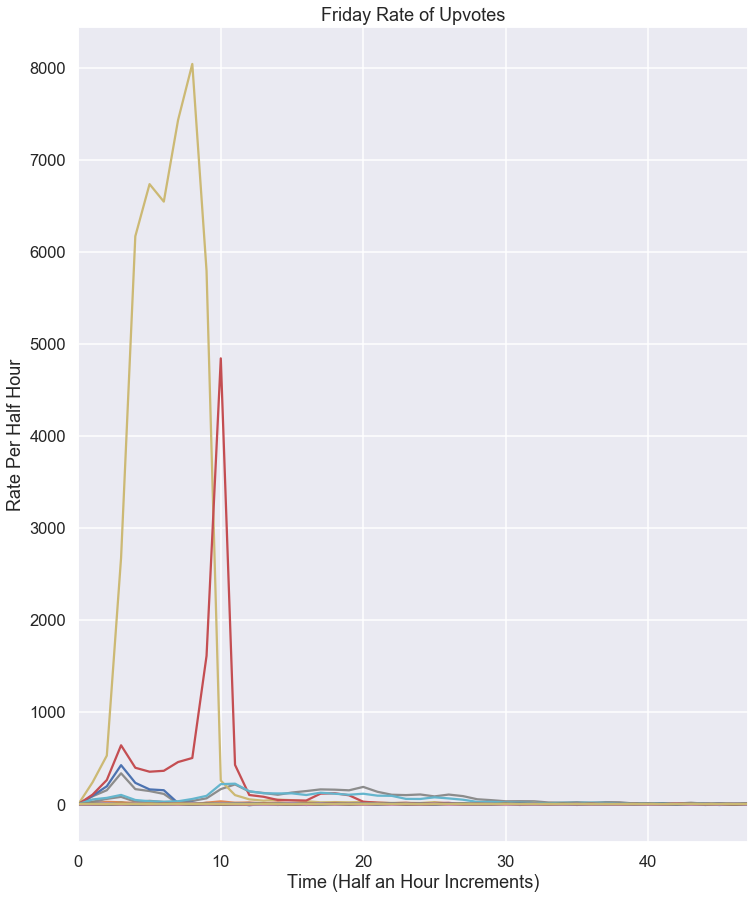

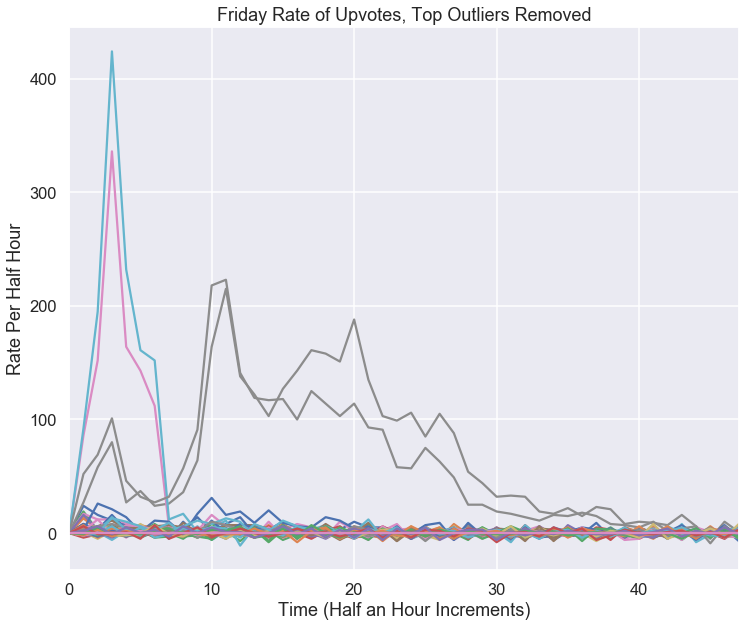

In [25]:
#Here is Friday's data to give an idea of the distribution of the posts
df_Friday_upvotes2 = df_Friday_upvotes1[df_Friday_upvotes1.keys()[1]]
data = df_Friday_upvotes1
data = data.drop(data.index[100])
x = data.keys()[1:50]

#Looking at the total upvotes during the day
y = data[x]
y_fixed = y.transpose()
friday_norm = y_fixed.plot(figsize = (12, 10), legend = None, title = 'Friday Upvotes by Post')
friday_norm.set_xlabel("Time")
friday_norm.set_ylabel("Upvotes")
y_fixed1 = y_fixed

#Because there are some large outliers, we want to have a better look at the data overall
for index in y_fixed:
    if y_fixed[index][30] >= 8000:
        y_fixed1 = y_fixed1.drop(columns = index)
    
friday_norm_fixed = y_fixed1.plot(figsize = (12, 10), legend = None, title = 'Friday Upvotes by Post, Top Outliers Removed')
friday_norm_fixed.set_xlabel("Time")
friday_norm_fixed.set_ylabel("Upvotes")

#Looking at the rate of upvotes during the whole day
slope = pd.DataFrame(index=range(0,48),columns=range(0,99))
for post in y_fixed:
    if post != 99:
        col = 0
        value1 = y_fixed[post][0]
        for value in y_fixed[post]:
            slope[post][col] = (value - value1)
            value1 = value
            col += 1
            
Friday_slope = slope.plot(figsize = (12, 15), legend = None, title = 'Friday Rate of Upvotes')
Friday_slope.set_xlabel("Time (Half an Hour Increments)")
Friday_slope.set_ylabel("Rate Per Half Hour")

#Because there are some large outliers, we want to have a better look at the data overall
slope1 = slope
for index in slope:
    if slope[index][10] >= 1000:
        slope1 = slope1.drop(columns = index)
    if slope[index][5] >= 1000:
        slope1 = slope1.drop(columns = index)
        
Friday_slope_fixed = slope1.plot(figsize = (12, 10), legend = None, title = 'Friday Rate of Upvotes, Top Outliers Removed')
Friday_slope_fixed.set_xlabel("Time (Half an Hour Increments)")
Friday_slope_fixed.set_ylabel("Rate Per Half Hour")

Here we have the Friday upvote line graphs. The first two graphs are visualizations of the first 100 upvotes for Friday. The last two graphs show the rate of change in the upvotes for Friday. Note that we performed these analyses for each day of the week but have only shown Friday's graphs for demonstration purposes. 

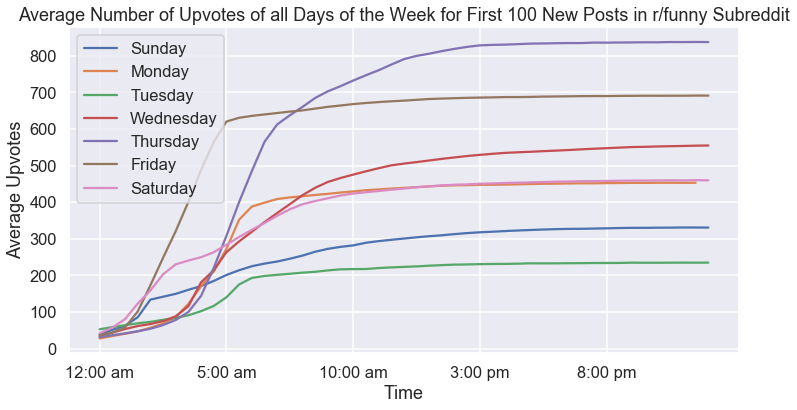

In [26]:
#plot all upvotes
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_mean_upvotes, label = 'Sunday')
plt.plot(df_Monday_mean_upvotes, label = 'Monday')
plt.plot(df_Tuesday_mean_upvotes, label = 'Tuesday')
plt.plot(df_Wednesday_mean_upvotes, label = 'Wednesday')
plt.plot(df_Thursday_mean_upvotes, label = 'Thursday')
plt.plot(df_Friday_mean_upvotes, label = 'Friday')
plt.plot(df_Saturday_mean_upvotes, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Average Number of Upvotes of all Days of the Week for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Upvotes')
plt.legend(loc='upper left')

This graph shows the average number of upvotes for the first 100 new posts in r/funny for all days of the week. It appears there is an optimal time frame for upvotes, typically happening in the first 12 hours from the posted time and then it levels off. As shown in the graph, Thursday has the highest average upvotes of all days of the week. 

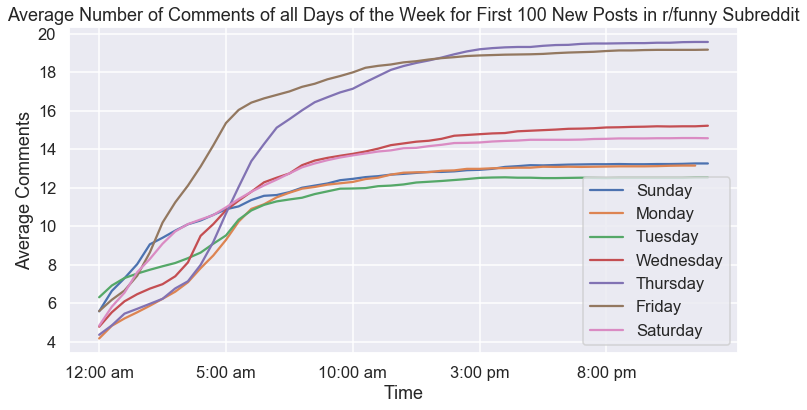

In [27]:
#plot all comments
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_mean_comments, label = 'Sunday')
plt.plot(df_Monday_mean_comments, label = 'Monday')
plt.plot(df_Tuesday_mean_comments, label = 'Tuesday')
plt.plot(df_Wednesday_mean_comments, label = 'Wednesday')
plt.plot(df_Thursday_mean_comments, label = 'Thursday')
plt.plot(df_Friday_mean_comments, label = 'Friday')
plt.plot(df_Saturday_mean_comments, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Average Number of Comments of all Days of the Week for First 100 New Posts in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Average Comments')
plt.legend(loc='lower right')

This graph shows the average number of comments for the first 100 new posts in r/funny for each day of the week. Here we also see an optimal time frame close to a 12 hour window where comments steadily rise and then promptly level off. This visualization of comments is positively correlated with average upvotes from the previous visualization. These results show that Thursday is also the day with the most activity for comments, although Friday follows closely behind.

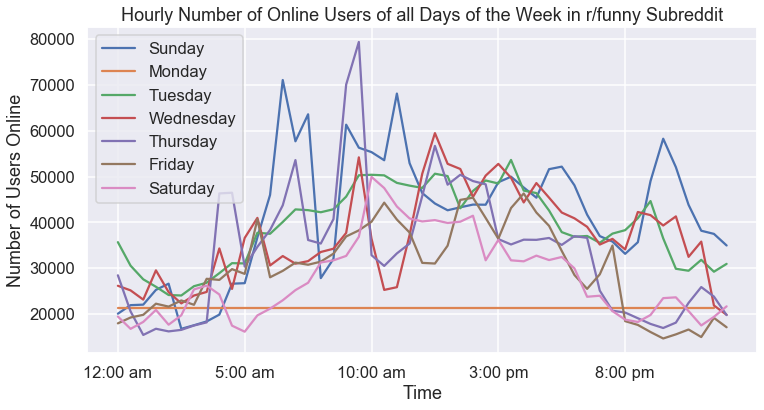

In [28]:
#plot all online users
plt.figure(figsize = (12, 6))
plt.plot(df_Sunday_online_users, label = 'Sunday')
plt.plot(df_Monday_online_users, label = 'Monday')
plt.plot(df_Tuesday_online_users, label = 'Tuesday')
plt.plot(df_Wednesday_online_users, label = 'Wednesday')
plt.plot(df_Thursday_online_users, label = 'Thursday')
plt.plot(df_Friday_online_users, label = 'Friday')
plt.plot(df_Saturday_online_users, label = 'Saturday')
plt.xticks(np.arange(0, 49, 10))
plt.title('Hourly Number of Online Users of all Days of the Week in r/funny Subreddit')
plt.xlabel('Time')
plt.ylabel('Number of Users Online')
plt.legend(loc='upper left')

This graph shows the average number of online users per hour, per day in r/funny. Here, we see that there is a general trend in peak users in a 10 hour time frame between 5 am and 3 pm. Thursday has the maximum users but does not consistently maintain the maximum users across time. Interestingly, Saturday is the day we hypothesized would be the optimal day for posting for maximum karma, yet Saturday holds the average minimum online users across time. Note the flat line for Monday's data was an error in data collection and thus does not accurately reflect Monday's actual average users. 

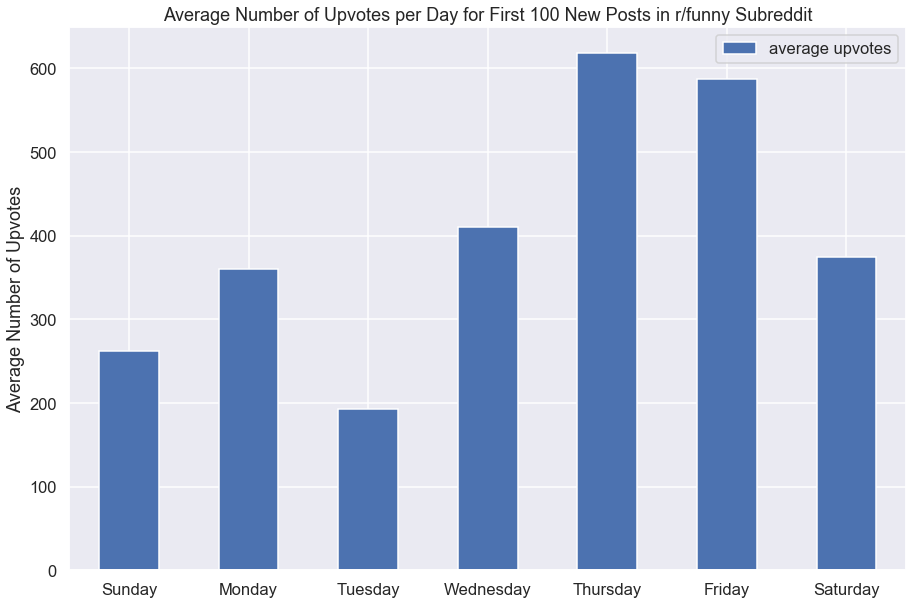

In [29]:
Sun_vote_avg = df_Sunday_mean_upvotes.mean()
Mon_vote_avg = df_Monday_mean_upvotes.mean()
Tues_vote_avg = df_Tuesday_mean_upvotes.mean()
Wed_vote_avg = df_Wednesday_mean_upvotes.mean()
Thurs_vote_avg = df_Thursday_mean_upvotes.mean()
Fri_vote_avg = df_Friday_mean_upvotes.mean()
Sat_vote_avg = df_Saturday_mean_upvotes.mean()

Total_up_avg = [Sun_vote_avg, Mon_vote_avg, Tues_vote_avg, Wed_vote_avg, Thurs_vote_avg, Fri_vote_avg, Sat_vote_avg]
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_upvote_bar = pd.DataFrame(Total_up_avg, index = labels)
Upvote_Bar = df_upvote_bar.plot.bar(figsize = (15,10), rot = 0)
plt.ylabel('Average Number of Upvotes')
plt.title('Average Number of Upvotes per Day for First 100 New Posts in r/funny Subreddit')
plt.xticks()
plt.legend(['average upvotes'])

This bar graph shows the average number of upvotes per day for the first 100 new posts in r/funny. Confirming the results from the previous graphs, this bar grpah shows that Thursday has the highest average upvotes than any other day, with Friday showing similar results. 

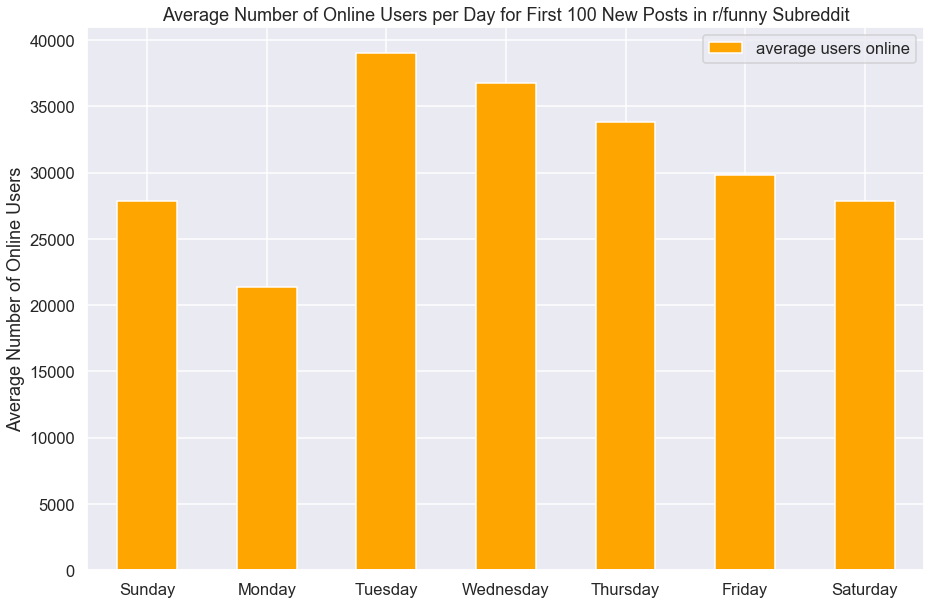

In [30]:
Sun_user_avg = df_Saturday_online_users.mean()
Mon_user_avg= df_Monday_online_users.mean()
Tues_user_avg = df_Tuesday_online_users.mean()
Wed_user_avg = df_Wednesday_online_users.mean()
Thurs_user_avg = df_Thursday_online_users.mean()
Fri_user_avg = df_Friday_online_users.mean()
Sat_user_avg = df_Saturday_online_users.mean()

Total_user_avg = [Sun_user_avg, Mon_user_avg, Tues_user_avg, Wed_user_avg, Thurs_user_avg, Fri_user_avg, Sat_user_avg]
labels = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_user_bar = pd.DataFrame(Total_user_avg, index = labels)
User_Bar = df_user_bar.plot.bar(figsize = (15, 10), color = 'orange', rot = 0)
plt.ylabel('Average Number of Online Users')
plt.title('Average Number of Online Users per Day for First 100 New Posts in r/funny Subreddit')
plt.xticks()
plt.legend(['average users online'])

This bar graph shows the average number of online users per day. This graph is a simplified overview of the previous line graph depicting hourly online users per day. In this graph, we can more clearly see a trend in average users. The maximum is Thursday, followed by Wednesday, Thursday, Friday, Saturday, Sunday and finally, the minimum average on Monday.

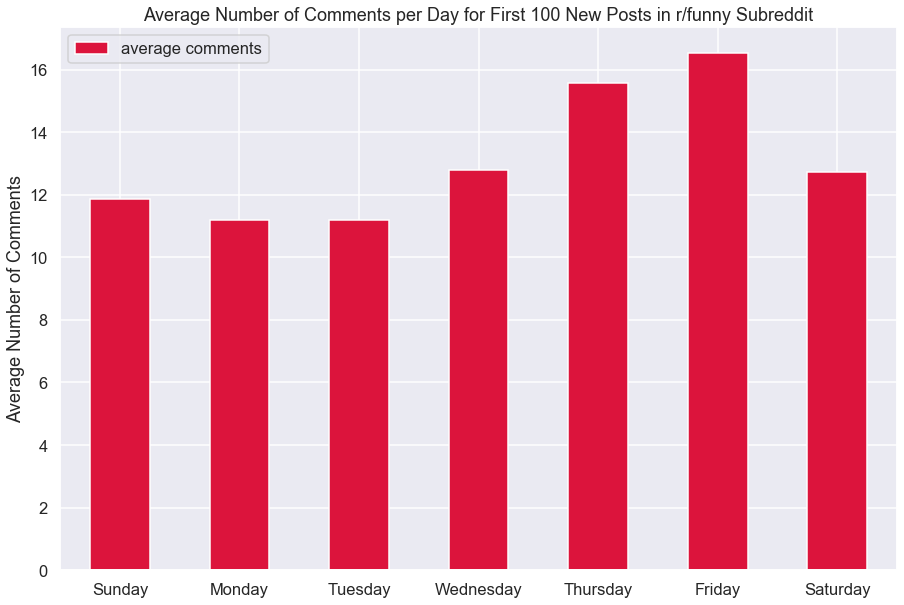

In [31]:
Sun_com_avg = df_Sunday_mean_comments.mean()
Mon_com_avg = df_Monday_mean_comments.mean()
Tues_com_avg = df_Tuesday_mean_comments.mean()
Wed_com_avg = df_Wednesday_mean_comments.mean()
Thurs_com_avg = df_Thursday_mean_comments.mean()
Fri_com_avg = df_Friday_mean_comments.mean()
Sat_com_avg = df_Saturday_mean_comments.mean()

Total_com_avg = [Sun_com_avg, Mon_com_avg, Tues_com_avg, Wed_com_avg, Thurs_com_avg, Fri_com_avg, Sat_com_avg]
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_com_bar = pd.DataFrame(Total_com_avg, index = labels)
Comment_Bar = df_com_bar.plot.bar(figsize = (15,10), color = 'crimson', rot = 0)
plt.ylabel('Average Number of Comments')
plt.title('Average Number of Comments per Day for First 100 New Posts in r/funny Subreddit')
plt.xticks()
plt.legend(['average comments'])

This bar graph shows the average number of comments per day for the first 100 posts on r/funny. This graph shows a maximum on Friday, with Thursday as a close second. Interestingly, this graph shows a trend of a rough negative correlation to the average online users, where the average users decreased per day but the comments seem to increase per day until Friday. 

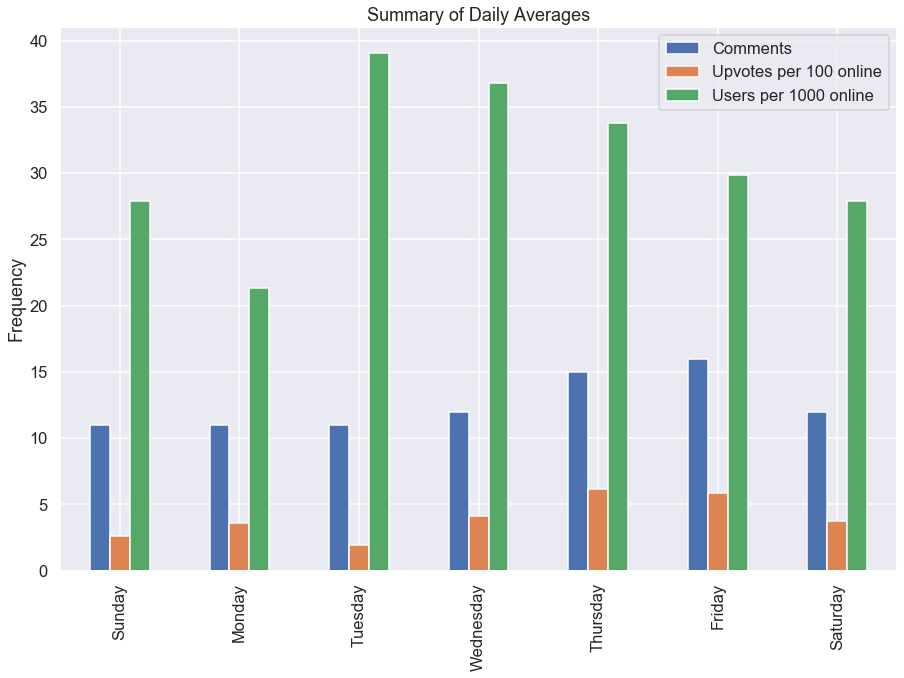

In [32]:
Upvotes = [int(Sun_vote_avg), int(Mon_vote_avg), int(Tues_vote_avg), int(Wed_vote_avg), int(Thurs_vote_avg), int(Fri_vote_avg), int(Sat_vote_avg)]
Comments = [int(Sun_com_avg), int(Mon_com_avg), int(Tues_com_avg), int(Wed_com_avg), int(Thurs_com_avg), int(Fri_com_avg), int(Sat_com_avg)]
Users = [int(Sun_user_avg), int(Mon_user_avg), int(Tues_user_avg), int(Wed_user_avg), int(Thurs_user_avg), int(Fri_user_avg), int(Sat_user_avg)]
Users = [u/1000 for u in Users]
Upvotes = [up/100 for up in Upvotes]
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_total_bar = pd.DataFrame({"Comments": Comments, "Upvotes per 100 online": Upvotes, "Users per 1000 online": Users}, index=labels)
Total_Bar = df_total_bar.plot.bar(figsize = (15,10), stacked = False)
plt.ylabel('Frequency')
plt.title('Summary of Daily Averages')
plt.legend()

Here we have a compilation of the previous three bar graphs of average online users, average comments, and average upvotes. Note, we had to scale each variable quite drastically to account for the large inbalances in averages. Based on the scaling, we can see that average online users is always much higher than average comments and upvotes. This is a trend we would expect, where the ease of activity follows the highest averages. Commenting requires the most effort and thus has the lowest average. Upvoting is somewhat effortful but less so than commenting so it has the next highest average; and finally, browsing is the least effortful as we can see by the much higher average (and reason for the large scaling implementation). 

# Ethics & Privacy

   The findings of this research question are useful beyond the trivial matter of boosting upvotes, they are valuable for businesses that use Reddit for marketing, for election posts that desire the greatest audience, for the greatest exposure to breaking news and controversial matters, etc. The implications of the research question at hand are great and can be further applied when additional subreddits are integrated. Although there are many limitations in the methods of our data collection process, the concept of this research question is very important. Using the data from this research in other subreddits could lead to more serious effects on post interaction. Users could utilize these findings to strategically generate the most karma per post, click farms can capitilize on this time efficacy, companies can maximize the monetary value of their marketing posts, and unfortunately, hategroups or negative propaganda posts can also rely on this data for maximum viewer exposure and sharing potential. 
   
   Additionally, although we do not collect any personally identifying information, the data collected is user generated and therefore may lead to a loss of confidentiality in ways we cannot forsee. For example, one issue we encountered was when we collected the current online active subscribers of r/funny; these username identifications are mostly annonymous but can inherently contain personally identifying aspects. We assume the likelihood that the majority of reddit users are unaware that their usernames, posts and overall reddit activity can be downloaded and analyzed by anyone.Therefore, our manipulation of user data could be viewed as a privacy violation by those unknowing users. Furthermore, if these research methods are applied to mutiple subreddits, users can be cross idenified as being active in various subreddits that are personally identifying that can very well lead to loss of anonymity.

# Conclusion & Discussion

We hypothesized that the optimal time to post on the r/funny subreddit was Saturday morning since we assumed that the majority of users tend to access the platform after a long week of labor/school. However, after data cleaning, analysis, and averaging the results, we must reject our hypothesis.

Based on our results, Thursday was shown to have the most average upvotes and average comments, with a peak average at around 12pm, during lunch time. Thus, we conclude that Thursday's at 12 pm is the most optimal time and day for posting for maximum karma. 

It could be that Thursday had the largest results because on Fridays and Saturdays, people tend to relax and hang out with friends or do activities which does not leave much time for browsing reddit. On Sundays, people could be finishing up the remaining weekend plans and for students, their homework.

Additionally, our datasets could have been confounded by other aspects contributing to the number of upvotes and comments a post gets. For example, outliers of posts accumulating upvotes in the 1000's deviate from the rest of the other posts that amass several to a hundred upvotes may very well have been influenced by the dynamic in which posts with more upvotes tend to get pushed to the top and therefore be noticed more, whereas posts with 0 upvotes get buried by the continuous stream of posts receiving upvotes and other new posts.

The methods of our data collection lead our results to be inherently biased and are subject to several limitations. Since we only analyzed data from the r/funny subreddit, we recognize that our analysis is not generalizable to all of Reddit. Our intention was to gain data-driven insights for Reddit trends using r/funny to derive these conclusions since it is one of the biggest subreddits with over 27 million members. In the future, we would like to improve our analysis by tracking different posts at multiple times instead of only midnight so that we get a wider range of analysis for posts made at various times. We would also like to track many subreddits beyond just posts from r/funny to find a generalizable trend for all of Reddit. 

Our results are limited by the difficulty in working with time-based data. We recognize that our findings are obscured by the fact that the timestamps we interpret are different depending on the users' geographical location. Therefore, we realize that our conculsion is only true for r/funny users in our timezone (we would have to do time conversion for users across the world). A final limitation is the validity of our results since we only have data collected from one specific week of the year. Ideally, we would want to track data year round to reach more sound conclusions but due to time constraints, we must make our conclusions based on only one week of data.

#### Upvote Data Results
From our upvotes data, it appears that posts made during midnight of Saturday and Sunday peaked around 11am. The two line graphs closely followed each other but Saturday posts had a higher average upvote count compared to Sunday. Wednesday and Thursday posts reach their peak around 12pm, lunch time. Monday, Tuesday, and Friday posts reached their peak around 6am. Ranking the days in from highest average upvotes to lowest: Thursday, Friday, Wednesday, Monday, Saturday, Sunday, Tuesday. So depending on the day, you should post 1-2 hours before the time of the peak upvotes for the corresponding day since that is when most upvotes are being given by user submissions. After time of peak upvotes, the average number of upvotes given is close to 0 which is why we see a flat line afterwards.

When we look at the rate of upvotes per day, we see that total upvotes and largest change of upvotes are largely correlated, as is expected. Comparing the ranks of both graphs, we see that most are in range of one place, such as a rank of 4 switching between a rank 3 and vice versa. The main outlier in this pattern is Wednesday, having rank 3 for most upvotes but rank 6 for largest change of upvotes, suggesting that the rate that day was steady throughout the day rather than at one time. Another interesting aspect of the data is that the highest rate of upvotes on our posts for each day occur around 2:30am to 7am. While the Saturday upvotes seemed to skyrocket at 2:30am, Thursday is on the opposite end with upvotes increasing the most at 7am. One detail that we can hypothesize from this graph is that a post has about 3-7 hours after it has been posted before it will reach its fastest growth. This doesn't contradict our peak upvotes, but rather gives an idea of the speed of the upvotes throughout the day.

In [33]:
data = {'Monday': ['6 am', 4], 'Tuesday': ['6 am',7], 'Wednesday':['12 pm',3], 'Thursday':['12 pm',1], 'Friday':['6 am', 2], 'Saturday': ['11 am',5], 'Sunday':['11 am',6]}
T = pd.DataFrame.from_dict(data, orient='index', columns = ['Time of Peak Upvotes', 'Rank for Most Upvotes'])
T

,Time of Peak Upvotes,Rank for Most Upvotes
Monday,6 am,4
Tuesday,6 am,7
Wednesday,12 pm,3
Thursday,12 pm,1
Friday,6 am,2
Saturday,11 am,5
Sunday,11 am,6


In [34]:
data = {'Monday': ['6 am', 3], 'Tuesday': ['5:30 am',7], 'Wednesday':['5 pm',6], 'Thursday':['7 pm',2], 'Friday':['3:30 am', 1], 'Saturday': ['2:30 am',5], 'Sunday':['5 am',4]}
T = pd.DataFrame.from_dict(data, orient='index', columns = ['Time of Highest Rate of Upvotes', 'Rank for Largest Change of Upvotes'])
T

,Time of Highest Rate of Upvotes,Rank for Largest Change of Upvotes
Monday,6 am,3
Tuesday,5:30 am,7
Wednesday,5 pm,6
Thursday,7 pm,2
Friday,3:30 am,1
Saturday,2:30 am,5
Sunday,5 am,4


#### Comment Data Results
The average number of comments graph had a similar form to the average number of upvotes graph. The ranking of days with the most comments was the same as the ranking for upvotes. The rate of comments being given to posts after they were posted at midnight roughly followed the same rate as upvotes. When upvotes were increasing rapidly, so were comments.

#### Online Users Data Results
It should be noted that there was a bug during collection of online users for Monday. The script was not correctly updating the values of online users so it kept appending the same value to the csv which is why we can see Monday as a straight line on the Online Users graph.

There are fluctuations in the amount of online users per day, but for most days the peak amount of online users lie between 9am and 4pm. Sunday peaks earlier at 7am and dips at 12am. Thursday has the absolute highest number of users on at a time. Sunday is second, but retains that amount of users for a longer time than Thursday.

In [35]:
data = {'Monday': ['12 am'], 'Tuesday': ['3:30 pm'], 'Wednesday':['12:30 pm'], 'Thursday':['9:30 am'], 'Friday':['4 pm'], 'Saturday': ['10 am'], 'Sunday':['6:30 am']}
T = pd.DataFrame.from_dict(data, orient='index', columns = ['Time of Peak Online Users'])
T

,Time of Peak Online Users
Monday,12 am
Tuesday,3:30 pm
Wednesday,12:30 pm
Thursday,9:30 am
Friday,4 pm
Saturday,10 am
Sunday,6:30 am
